# aim - ocn co2 and cflx hovmollers

In [33]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [34]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [35]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

#### get meshmask

In [36]:
start = 1955; end = 1957

scendict = {
    # Baynes Sound
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'color2':'orange'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'color2':'orangered'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'color2':'mediumseagreen'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'color2':'green'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'color2':'dodgerblue'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'color2':'mediumblue'}
}


## I converted .pkl to .nc, the pkl's looked like so. 

In [37]:
mapdir = '/gpfs/home/mep22dku/scratch/SOZONE/MEDUSA/BSUB_extractions/EXTRACT/'
# tmod = 'UKESM'; tvar = 'OCN_PCO2'; 
# time1 = time.time()
# tscen = '1A'
# UKESM_1A_pco2 = pickle.load(open(f'{mapdir}UKESM_{tscen}_{tvar}_lathovmoller_1950_2100.pkl', 'rb'))
# UKESM_1A_pco2 = UKESM_1A_pco2.load()
# time2 = time.time()
# print(f'{tscen} {time2-time1}')

In [38]:
UKESM_1A_cflx = xr.open_dataarray(f'{mapdir}UKESM_1A_cflx_lathovmoller_1950_2100.nc')
UKESM_1B_cflx = xr.open_dataarray(f'{mapdir}UKESM_1B_cflx_lathovmoller_1950_2100.nc')
UKESM_2A_cflx = xr.open_dataarray(f'{mapdir}UKESM_2A_cflx_lathovmoller_1950_2100.nc')
UKESM_2B_cflx = xr.open_dataarray(f'{mapdir}UKESM_2B_cflx_lathovmoller_1950_2100.nc')
UKESM_3A_cflx = xr.open_dataarray(f'{mapdir}UKESM_3A_cflx_lathovmoller_1950_2100.nc')
UKESM_3B_cflx = xr.open_dataarray(f'{mapdir}UKESM_3B_cflx_lathovmoller_1950_2100.nc')
TOM12_1A_cflx = xr.open_dataarray(f'{mapdir}TOM12_1A_cflx_lathovmoller_1950_2100.nc')
TOM12_1B_cflx = xr.open_dataarray(f'{mapdir}TOM12_1B_cflx_lathovmoller_1950_2100.nc')
TOM12_2A_cflx = xr.open_dataarray(f'{mapdir}TOM12_2A_cflx_lathovmoller_1950_2100.nc')
TOM12_2B_cflx = xr.open_dataarray(f'{mapdir}TOM12_2B_cflx_lathovmoller_1950_2100.nc')
TOM12_3A_cflx = xr.open_dataarray(f'{mapdir}TOM12_3A_cflx_lathovmoller_1950_2100.nc')
TOM12_3B_cflx = xr.open_dataarray(f'{mapdir}TOM12_3B_cflx_lathovmoller_1950_2100.nc')

UKESM_1A_pco2 = xr.open_dataarray(f'{mapdir}UKESM_1A_pco2_lathovmoller_1950_2100.nc')
UKESM_1B_pco2 = xr.open_dataarray(f'{mapdir}UKESM_1B_pco2_lathovmoller_1950_2100.nc')
UKESM_2A_pco2 = xr.open_dataarray(f'{mapdir}UKESM_2A_pco2_lathovmoller_1950_2100.nc')
UKESM_2B_pco2 = xr.open_dataarray(f'{mapdir}UKESM_2B_pco2_lathovmoller_1950_2100.nc')
UKESM_3A_pco2 = xr.open_dataarray(f'{mapdir}UKESM_3A_pco2_lathovmoller_1950_2100.nc')
UKESM_3B_pco2 = xr.open_dataarray(f'{mapdir}UKESM_3B_pco2_lathovmoller_1950_2100.nc')
TOM12_1A_pco2 = xr.open_dataarray(f'{mapdir}TOM12_1A_pco2_lathovmoller_1950_2100.nc')
TOM12_1B_pco2 = xr.open_dataarray(f'{mapdir}TOM12_1B_pco2_lathovmoller_1950_2100.nc')
TOM12_2A_pco2 = xr.open_dataarray(f'{mapdir}TOM12_2A_pco2_lathovmoller_1950_2100.nc')
TOM12_2B_pco2 = xr.open_dataarray(f'{mapdir}TOM12_2B_pco2_lathovmoller_1950_2100.nc')
TOM12_3A_pco2 = xr.open_dataarray(f'{mapdir}TOM12_3A_pco2_lathovmoller_1950_2100.nc')
TOM12_3B_pco2 = xr.open_dataarray(f'{mapdir}TOM12_3B_pco2_lathovmoller_1950_2100.nc')



In [39]:
UKESM_1A_cflx

<xarray.DataArray (time_counter: 1800, y: 332)>
[597600 values with dtype=float64]
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1950-01-31 ... 2099-12-31
Dimensions without coordinates: y

### get lats, lons, etc

Text(0.5, 1.0, 'tom area, m2')

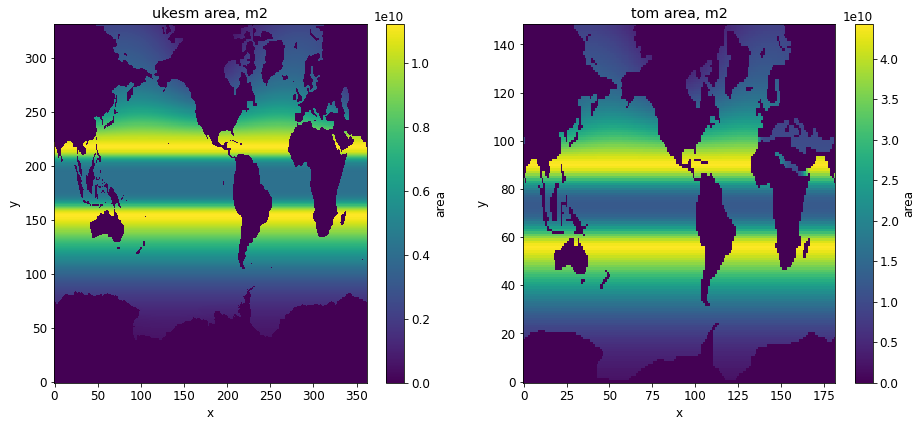

In [40]:
latmax_ukesm = 140
latmax_tom = 50

ukesm = xr.open_dataset('//gpfs/data/greenocean/software/resources/MEDUSA/PROC2/medusa_cj504_1y_2099_ptrc-T-CHLTADIC.nc')
tom = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_1ASA/ORCA2_1m_20200101_20201231_diad_T.nc')

tom.nav_lat[0,80].values

tomlat = np.arange(0,150,10)
tomlat_all = np.arange(0,149,1)
for i in range(0,150,10):
    tomlat[int(i/10)] = (tom.nav_lat[i,49].values)
    #print(np.nanmax(tom.nav_lat[i,:].values) - np.nanmin(tom.nav_lat[i,:].values))
ukesmlat = np.arange(0,330,20)
for i in range(0,330,20):
    ukesmlat[int(i/20)] = (ukesm.nav_lat[i,80].values)   
    #print(np.nanmax(ukesm.nav_lat[i,:].values) - np.nanmin(ukesm.nav_lat[i,:].values))

tommesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tommesh['area'] = tommesh.tmask[0,0,:,:] * tommesh.e1t[0,:,:] * tommesh.e2t[0,:,:]


ukmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/MEDUSA/mesh_mask_eORCA1_wrk.nc')
ukmesh['area'] = ukmesh.tmask[0,:,:] * ukmesh.e1t[:,:] * ukmesh.e2t[:,:]


ukesm_bylat = ukmesh['area'][0:latmax_ukesm,:].sum(dim = ['x'])
tom_bylat = tommesh['area'][0:latmax_tom,:].sum(dim = ['x'])

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(14*fact, 6*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ukmesh['area'].plot(ax = axs[0])
tommesh['area'].plot(ax = axs[1])
axs[0].set_title('ukesm area, m2')
axs[1].set_title('tom area, m2')

In [41]:
# print(ukesm_bylat[37:114])

print(ukesm.nav_lat[37:140,80].values)
print(tom.nav_lat[0:50,80].values)

[-77.86904  -77.71085  -77.55018  -77.38691  -77.22091  -77.05205
 -76.88019  -76.70518  -76.52686  -76.34509  -76.15969  -75.97049
 -75.77732  -75.579994 -75.37833  -75.17213  -74.961205 -74.74537
 -74.52442  -74.29817  -74.06642  -73.82898  -73.58566  -73.33629
 -73.08068  -72.81867  -72.5501   -72.27483  -71.99274  -71.70368
 -71.40758  -71.10435  -70.79392  -70.47626  -70.15134  -69.819176
 -69.47978  -69.13322  -68.779564 -68.41891  -68.051384 -67.67712
 -67.29627  -66.90862  -66.51326  -66.11152  -65.703316 -65.28857
 -64.867195 -64.4391   -64.00423  -63.56247  -63.113754 -62.658
 -62.195126 -61.725048 -61.247692 -60.762974 -60.27082  -59.77115
 -59.263885 -58.748955 -58.226284 -57.695797 -57.15743  -56.61111
 -56.05677  -55.494347 -54.923775 -54.344994 -53.75795  -53.162582
 -52.558838 -51.946674 -51.326035 -50.696884 -50.059177 -49.41288
 -48.757957 -48.094387 -47.422142 -46.7412   -46.051548 -45.353176
 -44.646076 -43.930252 -43.20571  -42.472458 -41.73051  -40.979897
 -40.220

In [42]:
tcol = 'orangered'



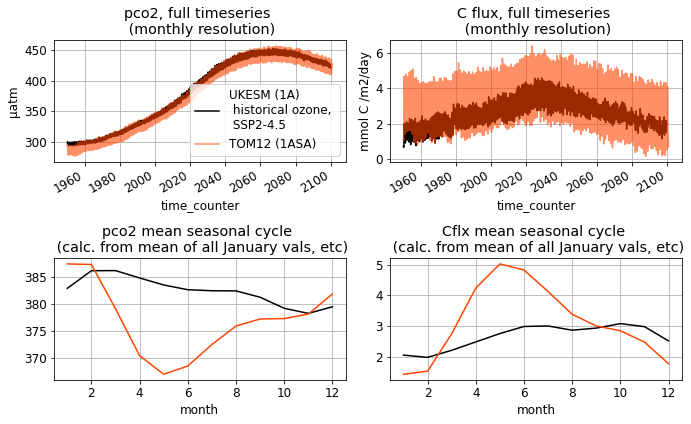

In [43]:
fact2 = 24*60*60*1000

fact = 0.55
fig, axs = plt.subplots(2,2, figsize=(18*fact, 11*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

UKESM_1A_pco2.sel(y=slice(0,latmax_ukesm)).weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[0], color = 'k', linestyle = '-',\
                                                                              label = 'UKESM (1A) \n historical ozone, \n SSP2-4.5')
tplt = TOM12_1A_pco2.sel(y=slice(0,latmax_tom)).weighted(tom_bylat).mean(dim = ['y'])
tplt.plot(ax = axs[0], color = tcol, linestyle = '-', alpha = 0.6, label = 'TOM12 (1ASA)')
UKESM_1A_cflx.sel(y=slice(0,latmax_ukesm)).weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[1], color = 'k', linestyle = '-')
tplt = TOM12_1A_cflx.sel(y=slice(0,latmax_tom)).weighted(tom_bylat).mean(dim = ['y'])*fact2
tplt.plot(ax = axs[1], color = tcol, linestyle = '-', alpha = 0.6)

UKESM_1A_pco2.groupby('time_counter.month').mean().sel(y=slice(0,latmax_ukesm)).weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[2], color = 'k', linestyle = '-')
TOM12_1A_pco2.groupby('time_counter.month').mean().sel(y=slice(0,latmax_tom)).weighted(tom_bylat).mean(dim = ['y']).plot(ax = axs[2], color = tcol, linestyle = '-')

UKESM_1A_cflx.groupby('time_counter.month').mean().sel(y=slice(0,latmax_ukesm)).weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[3], color = 'k', linestyle = '-')
tplt = TOM12_1A_cflx.groupby('time_counter.month').mean().sel(y=slice(0,latmax_tom)).weighted(tom_bylat).mean(dim = ['y']) *fact2
tplt.plot(ax = axs[3], color = tcol, linestyle = '-')

tits = ['pco2, full timeseries \n (monthly resolution)', 'C flux, full timeseries \n (monthly resolution)',\
        'pco2 mean seasonal cycle \n (calc. from mean of all January vals, etc)', 'Cflx mean seasonal cycle \n (calc. from mean of all January vals, etc)']
for i in range(0,4):
    axs[i].grid()
    axs[0].set_ylabel('µatm')
    axs[1].set_ylabel('mmol C /m2/day')
    #axs[i].set_xlim([1950,2100])
    axs[0].legend()
    axs[i].set_title(tits[i])
    
plt.tight_layout()

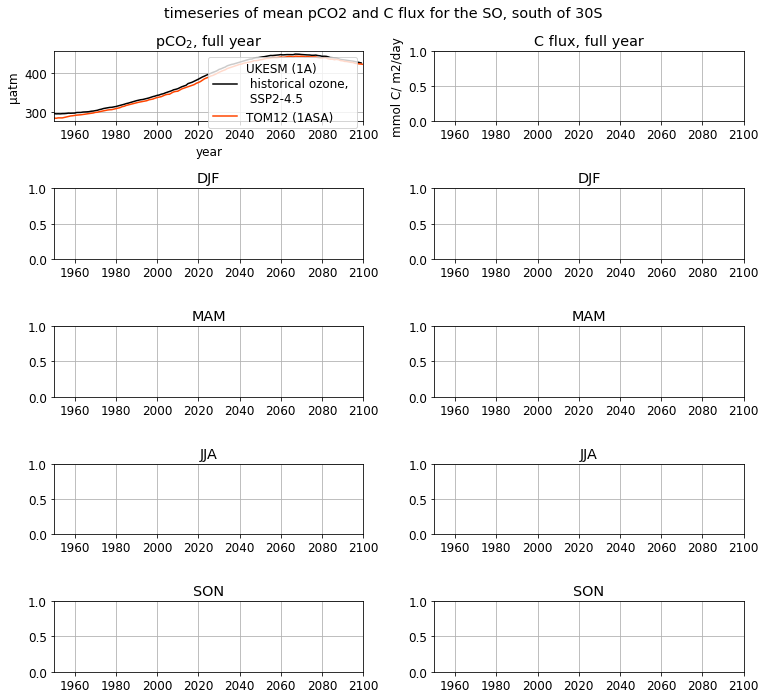

In [44]:

fact2 = 24*60*60*1000 #molC/m2/s to mmol/m2/day

fact = 0.9
fig, axs = plt.subplots(5,2, figsize=(12*fact, 11*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

## yearly mean pco2
UKESM_1A_pco2.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).\
weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[0], color = 'k', linestyle = '-', label = 'UKESM (1A) \n historical ozone, \n SSP2-4.5')
#--yearly mean, tom
tom_tp = TOM12_1A_pco2.groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).\
weighted(tom_bylat).mean(dim = ['y']).plot(ax = axs[0], color = tcol, linestyle = '-', label = 'TOM12 (1ASA)')

# ### yearly mean cflx
# UKESM_1A_cflx.groupby('time_counter.year').mean().sel(y=slice(0,ukesm_maxlat)).\
# weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[1], color = 'k', linestyle = '-')
# #--yearly mean, tom
# tom_tp = TOM12_1A_cflx.groupby('time_counter.year').mean().sel(y=slice(0,tom_maxlat)).\
# weighted(tom_bylat).mean(dim = ['y'])*fact2
# tom_tp.plot(ax = axs[1], color = tcol, linestyle = '-', label = 'TOM12 (1ASA)')

# ###djf pco2
# ind = 2
# UKESM_1A_pco2.sel(time_counter=(UKESM_1A_pco2['time_counter.season'] == 'DJF')).\
# groupby('time_counter.year').mean().sel(y=slice(0,ukesm_maxlat)).\
# weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[0+ind], color = 'k', linestyle = '-')
# ###---djf, tom
# tom_tp = TOM12_1A_pco2.sel(time_counter=(TOM12_1A_pco2['time_counter.season'] == 'DJF')).\
# groupby('time_counter.year').mean().sel(y=slice(0,tom_maxlat)).\
# weighted(tom_bylat).mean(dim = ['y'])
# tom_tp.plot(ax = axs[0+ind], color = tcol, linestyle = '-')
# ### djf cflx
# UKESM_1A_cflx.sel(time_counter=(UKESM_1A_cflx['time_counter.season'] == 'DJF')).\
# groupby('time_counter.year').mean().sel(y=slice(0,ukesm_maxlat)).\
# weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[1+ind], color = 'k', linestyle = '-')
# ###---djf, tom
# tom_tp = TOM12_1A_cflx.sel(time_counter=(TOM12_1A_cflx['time_counter.season'] == 'DJF')).\
# groupby('time_counter.year').mean().sel(y=slice(0,tom_maxlat)).\
# weighted(tom_bylat).mean(dim = ['y']) *fact2 
# tom_tp.plot(ax = axs[1+ind], color = tcol, linestyle = '-')

# ###MAM pco2
# ind = 4
# UKESM_1A_pco2.sel(time_counter=(UKESM_1A_pco2['time_counter.season'] == 'MAM')).\
# groupby('time_counter.year').mean().sel(y=slice(0,ukesm_maxlat)).\
# weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[0+ind], color = 'k', linestyle = '-')
# ###---MAM, tom
# tom_tp = TOM12_1A_pco2.sel(time_counter=(TOM12_1A_pco2['time_counter.season'] == 'MAM')).\
# groupby('time_counter.year').mean().sel(y=slice(0,tom_maxlat)).\
# weighted(tom_bylat).mean(dim = ['y'])
# tom_tp.plot(ax = axs[0+ind], color = tcol, linestyle = '-')
# ### MAM cflx
# UKESM_1A_cflx.sel(time_counter=(UKESM_1A_cflx['time_counter.season'] == 'MAM')).\
# groupby('time_counter.year').mean().sel(y=slice(0,ukesm_maxlat)).\
# weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[1+ind], color = 'k', linestyle = '-')
# ###---MAM, tom
# tom_tp = TOM12_1A_cflx.sel(time_counter=(TOM12_1A_cflx['time_counter.season'] == 'MAM')).\
# groupby('time_counter.year').mean().sel(y=slice(0,tom_maxlat)).\
# weighted(tom_bylat).mean(dim = ['y']) *fact2 
# tom_tp.plot(ax = axs[1+ind], color = tcol, linestyle = '-')

# ###JJA pco2
# ind = 6
# UKESM_1A_pco2.sel(time_counter=(UKESM_1A_pco2['time_counter.season'] == 'JJA')).\
# groupby('time_counter.year').mean().sel(y=slice(0,ukesm_maxlat)).\
# weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[0+ind], color = 'k', linestyle = '-')
# ###---JJA, tom
# tom_tp = TOM12_1A_pco2.sel(time_counter=(TOM12_1A_pco2['time_counter.season'] == 'JJA')).\
# groupby('time_counter.year').mean().sel(y=slice(0,tom_maxlat)).\
# weighted(tom_bylat).mean(dim = ['y'])
# tom_tp.plot(ax = axs[0+ind], color = tcol, linestyle = '-')
# ### JJA cflx
# UKESM_1A_cflx.sel(time_counter=(UKESM_1A_cflx['time_counter.season'] == 'JJA')).\
# groupby('time_counter.year').mean().sel(y=slice(0,ukesm_maxlat)).\
# weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[1+ind], color = 'k', linestyle = '-')
# ###---JJA, tom
# tom_tp = TOM12_1A_cflx.sel(time_counter=(TOM12_1A_cflx['time_counter.season'] == 'JJA')).\
# groupby('time_counter.year').mean().sel(y=slice(0,tom_maxlat)).\
# weighted(tom_bylat).mean(dim = ['y']) *fact2 
# tom_tp.plot(ax = axs[1+ind], color = tcol, linestyle = '-')

# ###SON pco2
# ind = 8
# UKESM_1A_pco2.sel(time_counter=(UKESM_1A_pco2['time_counter.season'] == 'SON')).\
# groupby('time_counter.year').mean().sel(y=slice(0,ukesm_maxlat)).\
# weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[0+ind], color = 'k', linestyle = '-')
# ###---SON, tom
# tom_tp = TOM12_1A_pco2.sel(time_counter=(TOM12_1A_pco2['time_counter.season'] == 'SON')).\
# groupby('time_counter.year').mean().sel(y=slice(0,tom_maxlat)).\
# weighted(tom_bylat).mean(dim = ['y'])
# tom_tp.plot(ax = axs[0+ind], color = tcol, linestyle = '-')
# ### SON cflx
# UKESM_1A_cflx.sel(time_counter=(UKESM_1A_cflx['time_counter.season'] == 'SON')).\
# groupby('time_counter.year').mean().sel(y=slice(0,ukesm_maxlat)).\
# weighted(ukesm_bylat).mean(dim = ['y']).plot(ax = axs[1+ind], color = 'k', linestyle = '-')
# ###---SON, tom
# tom_tp = TOM12_1A_cflx.sel(time_counter=(TOM12_1A_cflx['time_counter.season'] == 'SON')).\
# groupby('time_counter.year').mean().sel(y=slice(0,tom_maxlat)).\
# weighted(tom_bylat).mean(dim = ['y']) *fact2 
# tom_tp.plot(ax = axs[1+ind], color = tcol, linestyle = '-')

axs[0].legend()

tits = ['pCO$_2$, full year', 'C flux, full year', 'DJF','DJF', 'MAM','MAM', 'JJA','JJA', 'SON','SON']

for i in range(0,10):
    axs[i].grid()
    axs[i].set_xlim([1950,2100])
    axs[0].set_ylabel('µatm')
    axs[1].set_ylabel('mmol C/ m2/day')
    axs[i].set_title(tits[i])
    
fig.suptitle('timeseries of mean pCO2 and C flux for the SO, south of 30S')
plt.tight_layout()


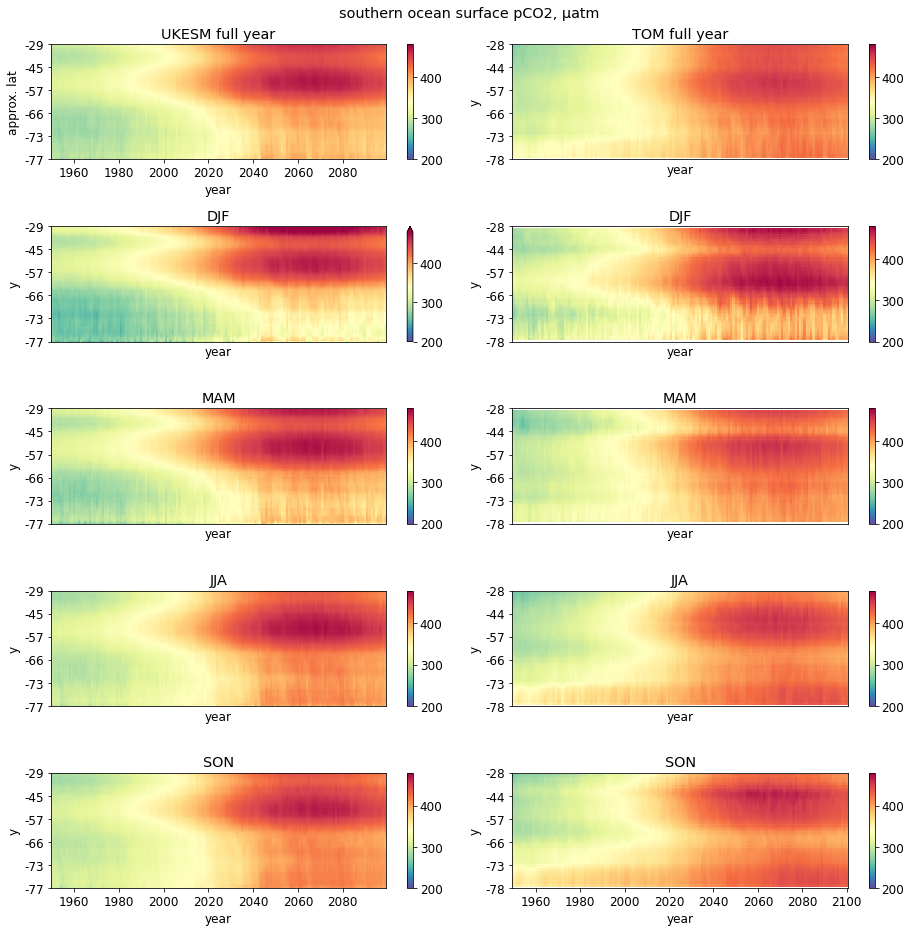

In [45]:
tvmin = 200
tvmax = 480
tcmap = 'Spectral_r'


fact = 1.1
fig, axs = plt.subplots(5,2, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tds = UKESM_1A_pco2
tds_tp = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T.plot(ax = axs[0], vmin = tvmin, vmax = tvmax, cmap = tcmap)  
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T.plot(ax = axs[2], vmin = tvmin, vmax = tvmax, cmap = tcmap)
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T.plot(ax = axs[4], vmin = tvmin, vmax = tvmax, cmap = tcmap)
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T.plot(ax = axs[6], vmin = tvmin, vmax = tvmax, cmap = tcmap)
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T.plot(ax = axs[8], vmin = tvmin, vmax = tvmax, cmap = tcmap)


tds = TOM12_1A_pco2
tds_tp = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T.plot(ax = axs[1], vmin = tvmin, vmax = tvmax, cmap = tcmap)  
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T.plot(ax = axs[3], vmin = tvmin, vmax = tvmax, cmap = tcmap)
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T.plot(ax = axs[5], vmin = tvmin, vmax = tvmax, cmap = tcmap)
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T.plot(ax = axs[7], vmin = tvmin, vmax = tvmax, cmap = tcmap)
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T.plot(ax = axs[9], vmin = tvmin, vmax = tvmax, cmap = tcmap)


for i in range(0,10,2):
    axs[i].set_yticks(np.arange(0,330,20))
    axs[i].set_yticklabels(ukesmlat)
    axs[i].set_ylim([40,latmax_ukesm])
    axs[0].set_ylabel('approx. lat')
for i in range(1,11,2):
    axs[i].set_yticks(np.arange(0,150,10))
    axs[i].set_yticklabels(tomlat)
    axs[i].set_ylim([0,latmax_tom])
    
for i in range(1,8):
    axs[i].set_xticks([])
    
ttit = ['UKESM full year', 'TOM full year','DJF', 'DJF', 'MAM', 'MAM', 'JJA', 'JJA', 'SON', 'SON']
for i in range(0,10):
    axs[i].set_title(ttit[i])
    
fig.suptitle('southern ocean surface pCO2, µatm')

plt.tight_layout()

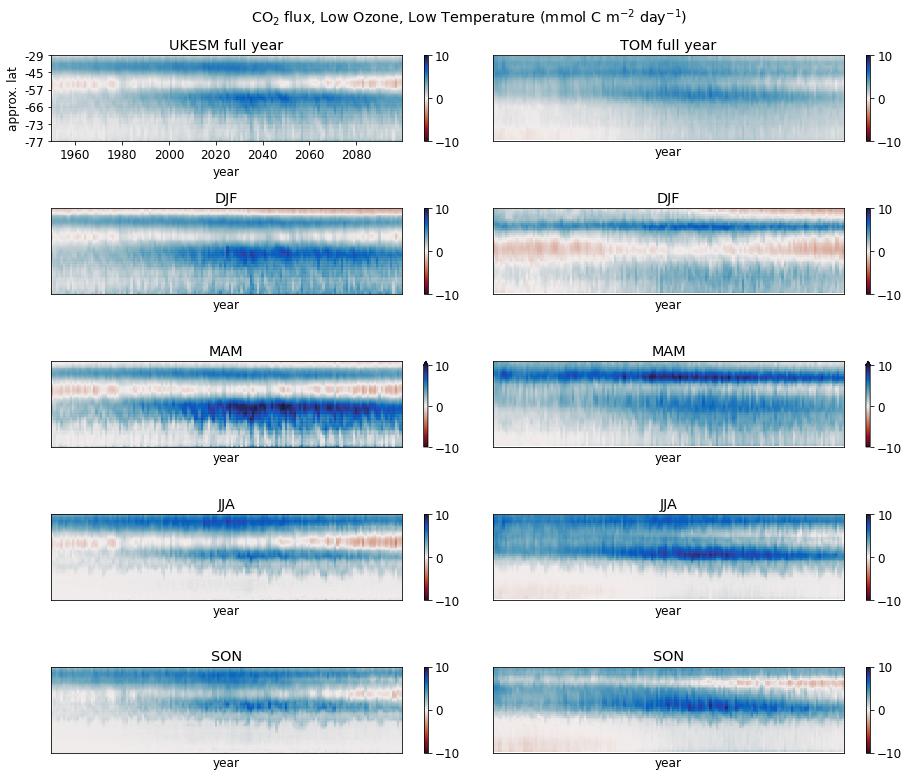

In [46]:
tvmin = -10
tvmax = 10
tcmap = cm.balance_r


fact = 1.1
fig, axs = plt.subplots(5,2, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tds = UKESM_1A_cflx
tds_tp2 = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T.plot(ax = axs[0], vmin = tvmin, vmax = tvmax, cmap = tcmap, label = 'mmol m$^{-2}$ day$^{-1}$')  
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T.plot(ax = axs[2], vmin = tvmin, vmax = tvmax, cmap = tcmap)
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T.plot(ax = axs[4], vmin = tvmin, vmax = tvmax, cmap = tcmap)
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T.plot(ax = axs[6], vmin = tvmin, vmax = tvmax, cmap = tcmap)
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T.plot(ax = axs[8], vmin = tvmin, vmax = tvmax, cmap = tcmap)


tds = TOM12_1A_cflx
tds_tp = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T *fact2
tds_tp.plot(ax = axs[1], vmin = tvmin, vmax = tvmax, cmap = tcmap)  
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T *fact2
tds_tp.plot(ax = axs[3], vmin = tvmin, vmax = tvmax, cmap = tcmap)
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T *fact2
tds_tp.plot(ax = axs[5], vmin = tvmin, vmax = tvmax, cmap = tcmap)
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T*fact2
tds_tp.plot(ax = axs[7], vmin = tvmin, vmax = tvmax, cmap = tcmap)
tds_tp = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T*fact2
tds_tp.plot(ax = axs[9], vmin = tvmin, vmax = tvmax, cmap = tcmap)


for i in range(0,10,2):
    axs[i].set_yticks(np.arange(0,330,20))
    axs[i].set_yticklabels(ukesmlat)
    axs[i].set_ylim([40,latmax_ukesm])
    axs[0].set_ylabel('approx. lat')
for i in range(1,11,2):
    axs[i].set_yticks(np.arange(0,150,10))
    axs[i].set_yticklabels(tomlat)
    axs[i].set_ylim([0,latmax_tom])
    
    
for i in range(1,10):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_ylabel('')
    
    
ttit = ['UKESM full year', 'TOM full year','DJF', 'DJF', 'MAM', 'MAM', 'JJA', 'JJA', 'SON', 'SON']
for i in range(0,10):
    axs[i].set_title(ttit[i])

# plt.colorbar(tds_tp2, ax = axs[0], label = 'mmol m$^{-2}$ day$^{-1}$')
fig.suptitle('CO$_2$ flux, Low Ozone, Low Temperature (mmol C m$^{-2}$ day$^{-1}$)')

plt.tight_layout()

(140, 150)
(140, 150)


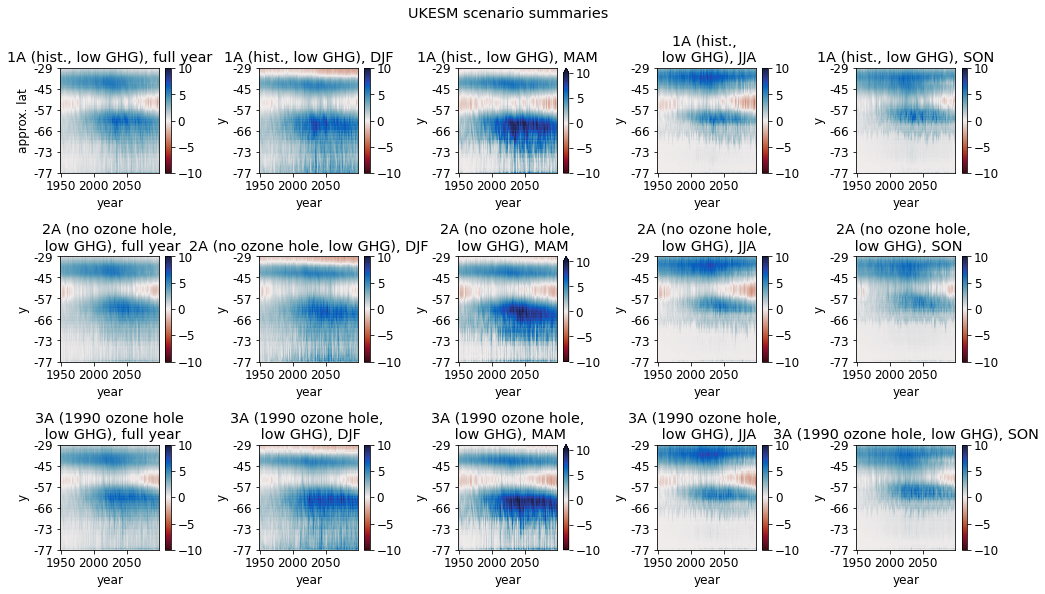

In [47]:
dmin = -2; dmax = 2
tds = UKESM_1A_cflx
FY_1A = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
DJF_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
MAM_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
JJA_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
SON_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T

tds = UKESM_2A_cflx
FY_2A = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
DJF_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
MAM_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
JJA_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
SON_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
print(np.shape(DJF_2A))

tds = UKESM_3A_cflx
FY_3A = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
DJF_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
MAM_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
JJA_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
SON_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
print(np.shape(DJF_3A))


tvmin = -10; tvmax = 10
dvmin = -2; dvmax = 2
fact = 0.7
cmap_dif = cm.curl

fig, axs = plt.subplots(3,5, figsize=(20*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
ind = 0
FY_1A.plot(ax = axs[0+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
DJF_1A.plot(ax = axs[1+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
MAM_1A.plot(ax = axs[2+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
JJA_1A.plot(ax = axs[3+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
SON_1A.plot(ax = axs[4+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)

ind = 5
FY_2A.plot(ax = axs[0+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
DJF_2A.plot(ax = axs[1+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
MAM_2A.plot(ax = axs[2+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
JJA_2A.plot(ax = axs[3+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
SON_2A.plot(ax = axs[4+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)

ind = 10
FY_3A.plot(ax = axs[0+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
DJF_3A.plot(ax = axs[1+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
MAM_3A.plot(ax = axs[2+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
JJA_3A.plot(ax = axs[3+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
SON_3A.plot(ax = axs[4+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)

tits = ['1A (hist., low GHG), full year','1A (hist., low GHG), DJF','1A (hist., low GHG), MAM','1A (hist., \n low GHG), JJA','1A (hist., low GHG), SON',
        '2A (no ozone hole,\n low GHG), full year','2A (no ozone hole, low GHG), DJF','2A (no ozone hole,\n  low GHG), MAM',\
        '2A (no ozone hole, \n low GHG), JJA','2A (no ozone hole, \n low GHG), SON',
        '3A (1990 ozone hole\n low GHG), full year','3A (1990 ozone hole, \n low GHG), DJF',
        '3A (1990 ozone hole,\n low GHG), MAM','3A (1990 ozone hole, \n low GHG), JJA','3A (1990 ozone hole, low GHG), SON']
for i in range(0,15):
    axs[i].set_yticks(np.arange(0,330,20))
    axs[i].set_yticklabels(ukesmlat)
    axs[i].set_ylim([40,latmax_ukesm])
    axs[0].set_ylabel('approx. lat')
    axs[i].set_title(tits[i])
    
plt.suptitle('UKESM scenario summaries')
plt.tight_layout()

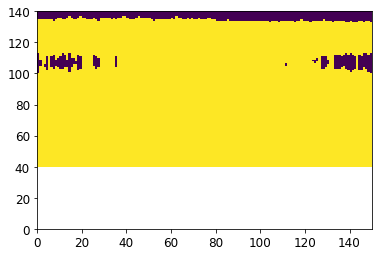

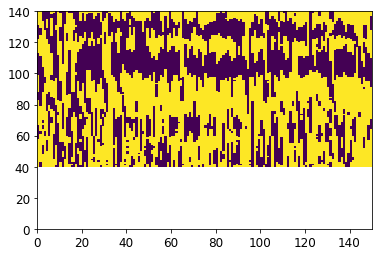

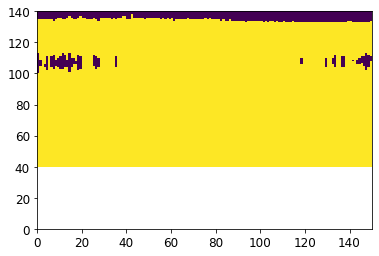

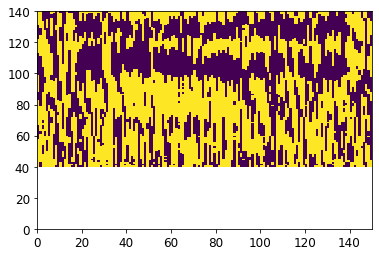

In [48]:
DJF_3A_t = DJF_3A.values
DJF_2A_t = DJF_2A.values
DJF_1A_t = DJF_1A.values

DJF_3A_og = np.copy(DJF_3A_t)
DJF_3A_og[DJF_3A_t<0] = -1
DJF_3A_og[DJF_3A_t>0] = 1
plt.figure()
plt.pcolormesh(DJF_3A_og)

DJF_3A_og2 = np.copy(DJF_3A_t)
DJF_3A_og2[DJF_3A_t<DJF_2A_t] = -1
DJF_3A_og2[DJF_3A_t>DJF_2A_t] = 1
plt.figure()
plt.pcolormesh(DJF_3A_og2)

DJF_1A_og = np.copy(DJF_1A_t)
DJF_1A_og[DJF_1A_t<0] = -1
DJF_1A_og[DJF_1A_t>0] = 1
plt.figure()
plt.pcolormesh(DJF_1A_og)

DJF_1A_og2 = np.copy(DJF_1A_t)
DJF_1A_og2[DJF_1A_t<DJF_2A_t] = -1
DJF_1A_og2[DJF_1A_t>DJF_2A_t] = 1
plt.figure()
plt.pcolormesh(DJF_1A_og2)

(50, 151)
(50, 151)


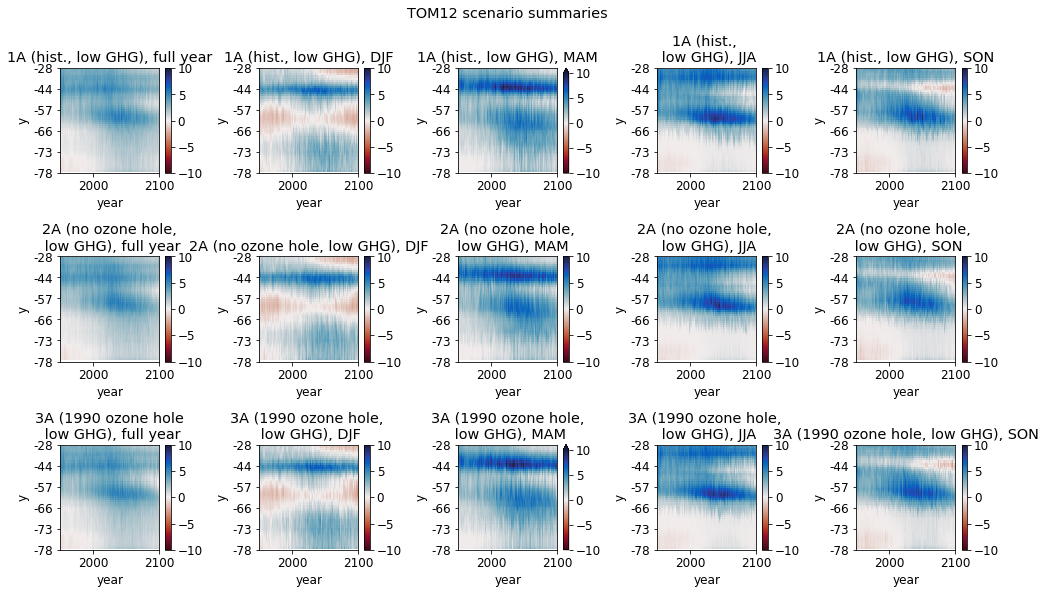

In [49]:
dmin = -2; dmax = 2
tds = TOM12_1A_cflx
FY_1A = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T* fact2
DJF_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T* fact2
MAM_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T* fact2
JJA_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T* fact2
SON_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T* fact2

tds = TOM12_2A_cflx
FY_2A = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T* fact2
DJF_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T* fact2
MAM_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T* fact2
JJA_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T* fact2
SON_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T* fact2
print(np.shape(DJF_2A))

tds = TOM12_3A_cflx
FY_3A = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T* fact2
DJF_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T* fact2
MAM_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T* fact2
JJA_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T* fact2
SON_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_tom)).T* fact2
print(np.shape(DJF_3A))


tvmin = -10; tvmax = 10
dvmin = -2; dvmax = 2
fact = 0.7
cmap_dif = cm.curl

fig, axs = plt.subplots(3,5, figsize=(20*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
ind = 0
FY_1A.plot(ax = axs[0+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
DJF_1A.plot(ax = axs[1+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
MAM_1A.plot(ax = axs[2+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
JJA_1A.plot(ax = axs[3+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
SON_1A.plot(ax = axs[4+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)

ind = 5
FY_2A.plot(ax = axs[0+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
DJF_2A.plot(ax = axs[1+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
MAM_2A.plot(ax = axs[2+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
JJA_2A.plot(ax = axs[3+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
SON_2A.plot(ax = axs[4+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)

ind = 10
FY_3A.plot(ax = axs[0+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
DJF_3A.plot(ax = axs[1+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
MAM_3A.plot(ax = axs[2+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
JJA_3A.plot(ax = axs[3+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
SON_3A.plot(ax = axs[4+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)

tits = ['1A (hist., low GHG), full year','1A (hist., low GHG), DJF','1A (hist., low GHG), MAM','1A (hist., \n low GHG), JJA','1A (hist., low GHG), SON',
        '2A (no ozone hole,\n low GHG), full year','2A (no ozone hole, low GHG), DJF','2A (no ozone hole,\n  low GHG), MAM',\
        '2A (no ozone hole, \n low GHG), JJA','2A (no ozone hole, \n low GHG), SON',
        '3A (1990 ozone hole\n low GHG), full year','3A (1990 ozone hole, \n low GHG), DJF',
        '3A (1990 ozone hole,\n low GHG), MAM','3A (1990 ozone hole, \n low GHG), JJA','3A (1990 ozone hole, low GHG), SON']
tits = ['1A (hist., low GHG), full year','1A (hist., low GHG), DJF','1A (hist., low GHG), MAM','1A (hist., \n low GHG), JJA','1A (hist., low GHG), SON',
        '2A (no ozone hole,\n low GHG), full year','2A (no ozone hole, low GHG), DJF','2A (no ozone hole,\n  low GHG), MAM',\
        '2A (no ozone hole, \n low GHG), JJA','2A (no ozone hole, \n low GHG), SON',
        '3A (1990 ozone hole\n low GHG), full year','3A (1990 ozone hole, \n low GHG), DJF',
        '3A (1990 ozone hole,\n low GHG), MAM','3A (1990 ozone hole, \n low GHG), JJA','3A (1990 ozone hole, low GHG), SON']
for i in range(0,15):
    axs[i].set_yticks(np.arange(0,150,10))
    axs[i].set_yticklabels(tomlat)
    axs[i].set_ylim([0,latmax_tom])
    axs[i].set_title(tits[i])
    
plt.suptitle('TOM12 scenario summaries')
plt.tight_layout()

(140, 150)
(140, 150)


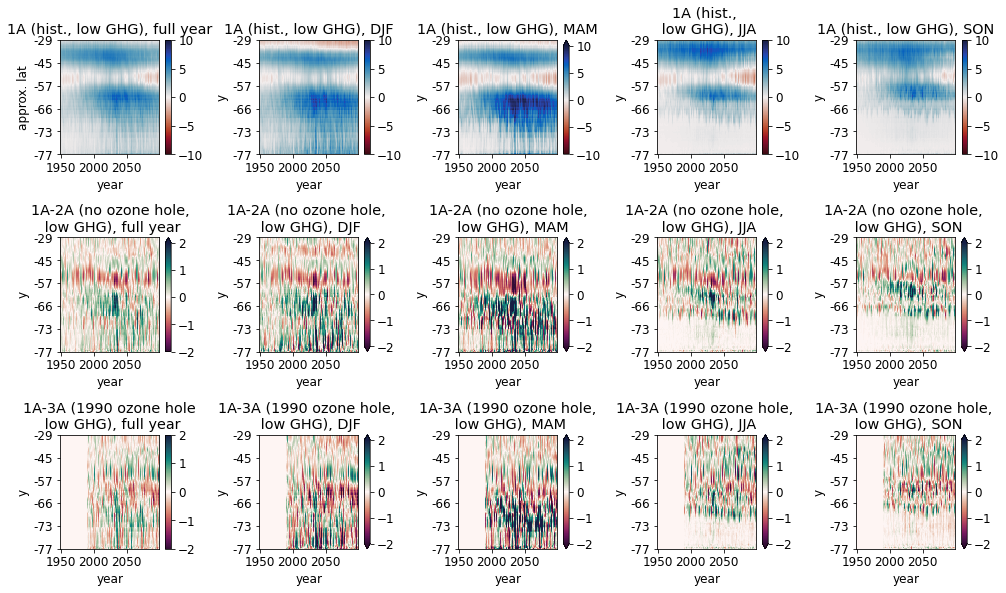

In [50]:
dmin = -2; dmax = 2
tds = UKESM_1A_cflx
FY_1A = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
DJF_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
MAM_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
JJA_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
SON_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T

tds = UKESM_2A_cflx
FY_2A = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
DJF_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
MAM_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
JJA_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
SON_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
print(np.shape(DJF_2A))

tds = UKESM_3A_cflx
FY_3A = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
DJF_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
MAM_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
JJA_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
SON_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
print(np.shape(DJF_3A))


tvmin = -10; tvmax = 10
dvmin = -2; dvmax = 2
fact = 0.7
cmap_dif = cm.curl_r

fig, axs = plt.subplots(3,5, figsize=(20*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
ind = 0
FY_1A.plot(ax = axs[0+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
DJF_1A.plot(ax = axs[1+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
MAM_1A.plot(ax = axs[2+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
JJA_1A.plot(ax = axs[3+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
SON_1A.plot(ax = axs[4+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)

ind = 5
(FY_1A-FY_2A).plot(ax = axs[0+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(DJF_1A-DJF_2A).plot(ax = axs[1+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(MAM_1A-MAM_2A).plot(ax = axs[2+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(JJA_1A-JJA_2A).plot(ax = axs[3+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(SON_1A-SON_2A).plot(ax = axs[4+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)

ind = 10
(FY_1A-FY_3A).plot(ax = axs[0+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(DJF_1A-DJF_3A).plot(ax = axs[1+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(MAM_1A-MAM_3A).plot(ax = axs[2+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(JJA_1A-JJA_3A).plot(ax = axs[3+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(SON_1A-SON_3A).plot(ax = axs[4+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)


tits = ['1A (hist., low GHG), full year','1A (hist., low GHG), DJF','1A (hist., low GHG), MAM','1A (hist., \n low GHG), JJA','1A (hist., low GHG), SON',
        '1A-2A (no ozone hole,\n low GHG), full year','1A-2A (no ozone hole, \n low GHG), DJF','1A-2A (no ozone hole,\n  low GHG), MAM',\
        '1A-2A (no ozone hole, \n low GHG), JJA','1A-2A (no ozone hole, \n low GHG), SON',
        '1A-3A (1990 ozone hole\n low GHG), full year','1A-3A (1990 ozone hole, \n low GHG), DJF',
        '1A-3A (1990 ozone hole,\n low GHG), MAM','1A-3A (1990 ozone hole, \n low GHG), JJA','1A-3A (1990 ozone hole, \n low GHG), SON']
for i in range(0,15):
    axs[i].set_yticks(np.arange(0,330,20))
    axs[i].set_yticklabels(ukesmlat)
    axs[i].set_ylim([40,latmax_ukesm])
    axs[0].set_ylabel('approx. lat')
    axs[i].set_title(tits[i])
    
plt.tight_layout()

In [51]:
dmin = -2; dmax = 2
tds = UKESM_1A_cflx
FY_1A = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
DJF_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
MAM_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
JJA_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
SON_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T

tds = UKESM_2A_cflx
FY_2A = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
DJF_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
MAM_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
JJA_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
SON_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
print(np.shape(DJF_2A))

tds = UKESM_3A_cflx
FY_3A = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
DJF_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
MAM_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
JJA_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
SON_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
print(np.shape(DJF_3A))


tvmin = -10; tvmax = 10
dvmin = -2; dvmax = 2
fact = 0.7
cmap_dif = cm.curl_r

fig, axs = plt.subplots(3,1, figsize=(8*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
ind = 0
#FY_1A.plot(ax = axs[0+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
DJF_2A.plot(ax = axs[0+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap, \
                cbar_kwargs={'label': "mmol m$^{-2}$ day$^{-1}$"})
tits = ['no ozone hole, low GHG, austral winter (2A)',\
        'forever ozone hole, low GHG, austral winter (3A)',\
        '(forever ozone hole-no ozone hole), austral winter ',]
        
    
DJF_3A.plot(ax = axs[1+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
tvmin = -3; tvmax = 3
(DJF_3A-DJF_2A).plot(ax = axs[2], vmin = tvmin, vmax = tvmax, cmap = cmap_dif)
# MAM_1A.plot(ax = axs[2+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
# JJA_1A.plot(ax = axs[3+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
# SON_1A.plot(ax = axs[4+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)

# ind = 5
# (FY_1A-FY_2A).plot(ax = axs[0+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
# (DJF_1A-DJF_2A).plot(ax = axs[1+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
# (MAM_1A-MAM_2A).plot(ax = axs[2+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
# (JJA_1A-JJA_2A).plot(ax = axs[3+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
# (SON_1A-SON_2A).plot(ax = axs[4+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)

# ind = 10
# (FY_1A-FY_3A).plot(ax = axs[0+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
# (DJF_1A-DJF_3A).plot(ax = axs[1+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
# (MAM_1A-MAM_3A).plot(ax = axs[2+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
# (JJA_1A-JJA_3A).plot(ax = axs[3+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
# (SON_1A-SON_3A).plot(ax = axs[4+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)


# tits = ['1A (hist., low GHG), full year','1A (hist., low GHG), DJF','1A (hist., low GHG), MAM','1A (hist., \n low GHG), JJA','1A (hist., low GHG), SON',
#         '1A-2A (no ozone hole,\n low GHG), full year','1A-2A (no ozone hole, \n low GHG), DJF','1A-2A (no ozone hole,\n  low GHG), MAM',\
#         '1A-2A (no ozone hole, \n low GHG), JJA','1A-2A (no ozone hole, \n low GHG), SON',
#         '1A-3A (1990 ozone hole\n low GHG), full year','1A-3A (1990 ozone hole, \n low GHG), DJF',
#         '1A-3A (1990 ozone hole,\n low GHG), MAM','1A-3A (1990 ozone hole, \n low GHG), JJA','1A-3A (1990 ozone hole, \n low GHG), SON']
for i in range(0,3):
    axs[i].set_yticks(np.arange(0,330,20))
    axs[i].set_yticklabels(ukesmlat)
    axs[i].set_ylim([40,latmax_ukesm])
    axs[i].set_ylabel('latitude ($^{\circ}$N)')
    axs[i].set_title(tits[i])
    
plt.tight_layout()
fig.savefig('posterhov.jpg', dpi = 300

SyntaxError: unexpected EOF while parsing (4064804384.py, line 77)

In [ ]:

tds = UKESM_1A_pco2
FY_1A = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
DJF_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
MAM_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
JJA_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
SON_1A = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T

tds = UKESM_2A_pco2
FY_2A = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
DJF_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
MAM_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
JJA_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
SON_2A = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
print(np.shape(DJF_2A))

tds = UKESM_3A_pco2
FY_3A = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
DJF_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
MAM_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
JJA_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
SON_3A = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
print(np.shape(DJF_3A))


tvmin = 300; tvmax = 450
dvmin = -10; dvmax = 10
fact = 0.7
cmap_dif = cm.curl_r

fig, axs = plt.subplots(3,5, figsize=(20*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
ind = 0
FY_1A.plot(ax = axs[0+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
DJF_1A.plot(ax = axs[1+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
MAM_1A.plot(ax = axs[2+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
JJA_1A.plot(ax = axs[3+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
SON_1A.plot(ax = axs[4+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)

ind = 5
(FY_1A-FY_2A).plot(ax = axs[0+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(DJF_1A-DJF_2A).plot(ax = axs[1+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(MAM_1A-MAM_2A).plot(ax = axs[2+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(JJA_1A-JJA_2A).plot(ax = axs[3+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(SON_1A-SON_2A).plot(ax = axs[4+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)

ind = 10
(FY_1A-FY_3A).plot(ax = axs[0+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(DJF_1A-DJF_3A).plot(ax = axs[1+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(MAM_1A-MAM_3A).plot(ax = axs[2+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(JJA_1A-JJA_3A).plot(ax = axs[3+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(SON_1A-SON_3A).plot(ax = axs[4+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)


tits = ['1A (hist., low GHG), full year','1A (hist., low GHG), DJF','1A (hist., low GHG), MAM','1A (hist., \n low GHG), JJA','1A (hist., low GHG), SON',
        '1A-2A (no ozone hole,\n low GHG), full year','1A-2A (no ozone hole, \n low GHG), DJF','1A-2A (no ozone hole,\n  low GHG), MAM',\
        '1A-2A (no ozone hole, \n low GHG), JJA','1A-2A (no ozone hole, \n low GHG), SON',
        '1A-3A (1990 ozone hole\n low GHG), full year','1A-3A (1990 ozone hole, \n low GHG), DJF',
        '1A-3A (1990 ozone hole,\n low GHG), MAM','1A-3A (1990 ozone hole, \n low GHG), JJA','1A-3A (1990 ozone hole, \n low GHG), SON']
for i in range(0,15):
    axs[i].set_yticks(np.arange(0,330,20))
    axs[i].set_yticklabels(ukesmlat)
    axs[i].set_ylim([40,latmax_ukesm])
    axs[0].set_ylabel('approx. lat')
    axs[i].set_title(tits[i])
    
plt.tight_layout()

In [ ]:
dmin = -2; dmax = 2
tds = UKESM_1B_cflx
FY_1B = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
DJF_1B = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
MAM_1B = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
JJA_1B = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
SON_1B = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T

tds = UKESM_2B_cflx
FY_2B = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
DJF_2B = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
MAM_2B = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
JJA_2B = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
SON_2B = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
print(np.shape(DJF_2B))

tds = UKESM_3B_cflx
FY_3B = tds.groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
DJF_3B = tds.sel(time_counter=(tds['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
MAM_3B = tds.sel(time_counter=(tds['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
JJA_3B = tds.sel(time_counter=(tds['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
SON_3B = tds.sel(time_counter=(tds['time_counter.season'] == 'SON')).groupby('time_counter.year').mean().sel(y=slice(0,latmax_ukesm)).T
print(np.shape(DJF_3B))


tvmin = -10; tvmax = 10
dvmin = -2; dvmax = 2
fact = 0.7
cmap_dif = cm.curl_r

fig, axs = plt.subplots(3,5, figsize=(20*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
ind = 0
FY_1B.plot(ax = axs[0+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
DJF_1B.plot(ax = axs[1+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
MAM_1B.plot(ax = axs[2+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
JJA_1B.plot(ax = axs[3+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)
SON_1B.plot(ax = axs[4+ind], vmin = tvmin, vmax = tvmax, cmap = tcmap)

ind = 5
(FY_1B-FY_2B).plot(ax = axs[0+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(DJF_1B-DJF_2B).plot(ax = axs[1+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(MAM_1B-MAM_2B).plot(ax = axs[2+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(JJA_1B-JJA_2B).plot(ax = axs[3+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(SON_1B-SON_2B).plot(ax = axs[4+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)

ind = 10
(FY_1B-FY_3B).plot(ax = axs[0+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(DJF_1B-DJF_3B).plot(ax = axs[1+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(MAM_1B-MAM_3B).plot(ax = axs[2+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(JJA_1B-JJA_3B).plot(ax = axs[3+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)
(SON_1B-SON_3B).plot(ax = axs[4+ind], vmin = dvmin, vmax = dvmax, cmap = cmap_dif)


tits = ['1B (hist., low GHG), full year','1B (hist., low GHG), DJF','1B (hist., low GHG), MAM','1B (hist., \n low GHG), JJA','1B (hist., low GHG), SON',
        '1B-2B (no ozone hole,\n low GHG), full year','1B-2B (no ozone hole, \n low GHG), DJF','1B-2B (no ozone hole,\n  low GHG), MAM',\
        '1B-2B (no ozone hole, \n low GHG), JJA','1B-2B (no ozone hole, \n low GHG), SON',
        '1B-3B (1990 ozone hole\n low GHG), full year','1B-3B (1990 ozone hole, \n low GHG), DJF',
        '1B-3B (1990 ozone hole,\n low GHG), MAM','1B-3B (1990 ozone hole, \n low GHG), JJA','1B-3B (1990 ozone hole, \n low GHG), SON']
for i in range(0,15):
    axs[i].set_yticks(np.arange(0,330,20))
    axs[i].set_yticklabels(ukesmlat)
    axs[i].set_ylim([40,latmax_ukesm])
    axs[0].set_ylabel('approx. lat')
    axs[i].set_title(tits[i])
    
plt.tight_layout()

In [ ]:
tw = (DJF_1B*ukesm_bylat).values
print(np.sum(tw[tw>0]))

tw = (DJF_2B*ukesm_bylat).values
print(np.sum(tw[tw>0]))

tw = (DJF_3B*ukesm_bylat).values
print(np.sum(tw[tw>0]))
print()

tw = (DJF_1B*ukesm_bylat).values
print(np.sum(tw[tw<0]))

tw = (DJF_2B*ukesm_bylat).values
print(np.sum(tw[tw<0]))

tw = (DJF_3B*ukesm_bylat).values
print(np.sum(tw[tw<0])/1e15)

In [ ]:
ukesm.nav_lat[0:114,80].values

print(ukesm.nav_lat[61,80].values)
print(ukesm.nav_lat[82,80].values)
print(ukesm.nav_lat[101,80].values)

#61, 82, 101

In [ ]:
# print(ukesm_bylat)

#61, 82, 101

fig, axs = plt.subplots(5,2, figsize=(20*fact, 20*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

sbound = 0; nbound = latmax_ukesm; ind = 0
tplt = UKESM_1A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat
UKESM_1A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
UKESM_1A_sum.plot(ax = axs[0+ind], color = scendict['1A']['color'], label = scendict['1A']['name'])

tplt = UKESM_2A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat
UKESM_2A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
UKESM_2A_sum.plot(ax = axs[0+ind], color = scendict['2A']['color'], label = scendict['2A']['name'])

tplt = UKESM_3A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat
UKESM_3A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
UKESM_3A_sum.plot(ax = axs[0+ind], color = scendict['3A']['color'], label = scendict['3A']['name'])

(UKESM_1A_sum-UKESM_2A_sum).plot(ax = axs[1+ind], color = scendict['2A']['color'], label = 'hist - no-ozone')
(UKESM_1A_sum-UKESM_3A_sum).plot(ax = axs[1+ind], color = scendict['3A']['color'], label = 'hist - ozone 1990')
axs[0+ind].legend(fontsize = 10)
axs[1+ind].legend(fontsize = 10)
sboundlat = int(ukesm.nav_lat[sbound,80].values)
nboundlat = int(ukesm.nav_lat[nbound,80].values)
axs[0+ind].set_title(f'full year Cflx, {sboundlat}-{nboundlat}')
axs[1+ind].set_title(f'full year Cflx differences, {sboundlat}-{nboundlat}')
#-----
sbound = 0; nbound = 61; ind = 2
tplt = UKESM_1A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
UKESM_1A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
UKESM_1A_sum.plot(ax = axs[0+ind], color = scendict['1A']['color'])

tplt = UKESM_2A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
UKESM_2A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
UKESM_2A_sum.plot(ax = axs[0+ind], color = scendict['2A']['color'])

tplt = UKESM_3A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
UKESM_3A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
UKESM_3A_sum.plot(ax = axs[0+ind], color = scendict['3A']['color'])

(UKESM_1A_sum-UKESM_2A_sum).plot(ax = axs[1+ind], color = scendict['2A']['color'], label = 'hist - no-ozone')
(UKESM_1A_sum-UKESM_3A_sum).plot(ax = axs[1+ind], color = scendict['3A']['color'], label = 'hist - ozone 1990')
sboundlat = int(ukesm.nav_lat[sbound,80].values)
nboundlat = int(ukesm.nav_lat[nbound,80].values)
axs[0+ind].set_title(f'full year Cflx, {sboundlat}-{nboundlat}')
axs[1+ind].set_title(f'full year Cflx differences, {sboundlat}-{nboundlat}')
#-----
sbound = 61; nbound = 82; ind = 4
tplt = UKESM_1A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
UKESM_1A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
UKESM_1A_sum.plot(ax = axs[0+ind], color = scendict['1A']['color'])

tplt = UKESM_2A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
UKESM_2A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
UKESM_2A_sum.plot(ax = axs[0+ind], color = scendict['2A']['color'])

tplt = UKESM_3A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
UKESM_3A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
UKESM_3A_sum.plot(ax = axs[0+ind], color = scendict['3A']['color'])

(UKESM_1A_sum-UKESM_2A_sum).plot(ax = axs[1+ind], color = scendict['2A']['color'], label = 'hist - no-ozone')
(UKESM_1A_sum-UKESM_3A_sum).plot(ax = axs[1+ind], color = scendict['3A']['color'], label = 'hist - ozone 1990')
sboundlat = int(ukesm.nav_lat[sbound,80].values)
nboundlat = int(ukesm.nav_lat[nbound,80].values)
axs[0+ind].set_title(f'full year Cflx, {sboundlat}-{nboundlat}')
axs[1+ind].set_title(f'full year Cflx differences, {sboundlat}-{nboundlat}')
#-----
sbound = 82; nbound = 101; ind = 6
tplt = UKESM_1A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
UKESM_1A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
UKESM_1A_sum.plot(ax = axs[0+ind], color = scendict['1A']['color'])

tplt = UKESM_2A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
UKESM_2A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
UKESM_2A_sum.plot(ax = axs[0+ind], color = scendict['2A']['color'])

tplt = UKESM_3A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
UKESM_3A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
UKESM_3A_sum.plot(ax = axs[0+ind], color = scendict['3A']['color'])

(UKESM_1A_sum-UKESM_2A_sum).plot(ax = axs[1+ind], color = scendict['2A']['color'], label = 'hist - no-ozone')
(UKESM_1A_sum-UKESM_3A_sum).plot(ax = axs[1+ind], color = scendict['3A']['color'], label = 'hist - ozone 1990')
sboundlat = int(ukesm.nav_lat[sbound,80].values)
nboundlat = int(ukesm.nav_lat[nbound,80].values)
axs[0+ind].set_title(f'full year Cflx, {sboundlat}-{nboundlat}')
axs[1+ind].set_title(f'full year Cflx differences, {sboundlat}-{nboundlat}')
#-----
sbound = 101; nbound = 114; ind = 8
tplt = UKESM_1A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
UKESM_1A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
UKESM_1A_sum.plot(ax = axs[0+ind], color = scendict['1A']['color'])

tplt = UKESM_2A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
UKESM_2A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
UKESM_2A_sum.plot(ax = axs[0+ind], color = scendict['2A']['color'])

tplt = UKESM_3A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
UKESM_3A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
UKESM_3A_sum.plot(ax = axs[0+ind], color = scendict['3A']['color'])

(UKESM_1A_sum-UKESM_2A_sum).plot(ax = axs[1+ind], color = scendict['2A']['color'], label = 'hist - no-ozone')
(UKESM_1A_sum-UKESM_3A_sum).plot(ax = axs[1+ind], color = scendict['3A']['color'], label = 'hist - ozone 1990')
sboundlat = int(ukesm.nav_lat[sbound,80].values)
nboundlat = int(ukesm.nav_lat[nbound,80].values)
axs[0+ind].set_title(f'full year Cflx, {sboundlat}-{nboundlat}')
axs[1+ind].set_title(f'full year Cflx differences, {sboundlat}-{nboundlat}')

for i in range(0,10):
    axs[i].axhline(y=0)
    axs[i].grid()
    
plt.tight_layout()

In [ ]:
fact = 0.6
fig, axs = plt.subplots(5,5, figsize=(30*fact, 20*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


def plot_things(sbound,nbound,ind):
    tplt = UKESM_1A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_1A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    UKESM_1A_sum.plot(ax = axs[0+ind], color = scendict['1A']['color'], label = scendict['1A']['name'])

    tplt = UKESM_2A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_2A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    UKESM_2A_sum.plot(ax = axs[0+ind], color = scendict['2A']['color'], label = scendict['2A']['name'])

    tplt = UKESM_3A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_3A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    UKESM_3A_sum.plot(ax = axs[0+ind], color = scendict['3A']['color'], label = scendict['3A']['name'])
    ####-----
    tplt = UKESM_1A_cflx.sel(time_counter=(UKESM_1A_pco2['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_1A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    UKESM_1A_sum.plot(ax = axs[1+ind], color = scendict['1A']['color'], label = scendict['1A']['name'])
    tplt = UKESM_2A_cflx.sel(time_counter=(UKESM_2A_pco2['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_2A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    UKESM_2A_sum.plot(ax = axs[1+ind], color = scendict['2A']['color'], label = scendict['2A']['name'])
    tplt = UKESM_3A_cflx.sel(time_counter=(UKESM_3A_pco2['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_3A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    UKESM_3A_sum.plot(ax = axs[1+ind], color = scendict['3A']['color'], label = scendict['3A']['name'])
    ####-----
    tplt = UKESM_1A_cflx.sel(time_counter=(UKESM_1A_pco2['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_1A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    UKESM_1A_sum.plot(ax = axs[2+ind], color = scendict['1A']['color'], label = scendict['1A']['name'])
    tplt = UKESM_2A_cflx.sel(time_counter=(UKESM_2A_pco2['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_2A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    UKESM_2A_sum.plot(ax = axs[2+ind], color = scendict['2A']['color'], label = scendict['2A']['name'])
    tplt = UKESM_3A_cflx.sel(time_counter=(UKESM_3A_pco2['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_3A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    UKESM_3A_sum.plot(ax = axs[2+ind], color = scendict['3A']['color'], label = scendict['3A']['name'])
    ###----
    tplt = UKESM_1A_cflx.sel(time_counter=(UKESM_1A_pco2['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_1A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    UKESM_1A_sum.plot(ax = axs[3+ind], color = scendict['1A']['color'], label = scendict['1A']['name'])
    tplt = UKESM_2A_cflx.sel(time_counter=(UKESM_2A_pco2['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_2A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    UKESM_2A_sum.plot(ax = axs[3+ind], color = scendict['2A']['color'], label = scendict['2A']['name'])
    tplt = UKESM_3A_cflx.sel(time_counter=(UKESM_3A_pco2['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_3A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    UKESM_3A_sum.plot(ax = axs[3+ind], color = scendict['3A']['color'], label = scendict['3A']['name'])
    ###----
    tplt = UKESM_1A_cflx.sel(time_counter=(UKESM_1A_pco2['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_1A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    UKESM_1A_sum.plot(ax = axs[4+ind], color = scendict['1A']['color'], label = scendict['1A']['name'])
    tplt = UKESM_2A_cflx.sel(time_counter=(UKESM_2A_pco2['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_2A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    UKESM_2A_sum.plot(ax = axs[4+ind], color = scendict['2A']['color'], label = scendict['2A']['name'])
    tplt = UKESM_3A_cflx.sel(time_counter=(UKESM_3A_pco2['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_3A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    UKESM_3A_sum.plot(ax = axs[4+ind], color = scendict['3A']['color'], label = scendict['3A']['name'])
    
    sboundlat = int(ukesm.nav_lat[sbound,80].values)
    nboundlat = int(ukesm.nav_lat[nbound,80].values)

    axs[0+ind].set_title(f'full year Cflx, {sboundlat}-{nboundlat}')
    axs[1+ind].set_title(f'DJF Cflx, {sboundlat}-{nboundlat}')
    axs[2+ind].set_title(f'MAM Cflx, {sboundlat}-{nboundlat}')
    axs[3+ind].set_title(f'JJA Cflx, {sboundlat}-{nboundlat}')
    axs[4+ind].set_title(f'SON Cflx, {sboundlat}-{nboundlat}')
    axs[0].legend(fontsize = 10)
    
sbound = 0; nbound = 114; ind = 0
plot_things(sbound,nbound,ind)
sbound = 0; nbound = 61; ind = 5
plot_things(sbound,nbound,ind)
sbound = 61; nbound = 82; ind = 10
plot_things(sbound,nbound,ind)
sbound = 82; nbound = 101; ind = 15
plot_things(sbound,nbound,ind)
sbound = 101; nbound = 114; ind = 20
plot_things(sbound,nbound,ind)
for i in range(0,25):
    axs[i].grid(alpha = 0.5)

fig.suptitle('Mean Cflx by scenario in the UKESM, subdivided by season and latitude (pG C/year)')
plt.tight_layout()

In [ ]:
fact = 0.6
fig, axs = plt.subplots(5,5, figsize=(30*fact, 20*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


def plot_dif(sbound,nbound,ind):
    tplt = UKESM_1A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_1A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    #UKESM_1A_sum.plot(ax = axs[0+ind], color = scendict['1A']['color'], label = scendict['1A']['name'])
    tplt = UKESM_2A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_2A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    (UKESM_1A_sum-UKESM_2A_sum).plot(ax = axs[0+ind], color = scendict['2A']['color'], label = scendict['2A']['name'])

    tplt = UKESM_3A_cflx.groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_3A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    (UKESM_1A_sum-UKESM_3A_sum).plot(ax = axs[0+ind], color = scendict['3A']['color'], label = scendict['3A']['name'])
    ####-----
    tplt = UKESM_1A_cflx.sel(time_counter=(UKESM_1A_pco2['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_1A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    #UKESM_1A_sum.plot(ax = axs[1+ind], color = scendict['1A']['color'], label = scendict['1A']['name'])
    tplt = UKESM_2A_cflx.sel(time_counter=(UKESM_2A_pco2['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_2A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    (UKESM_1A_sum-UKESM_2A_sum).plot(ax = axs[1+ind], color = scendict['2A']['color'], label = scendict['2A']['name'])
    tplt = UKESM_3A_cflx.sel(time_counter=(UKESM_3A_pco2['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_3A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    (UKESM_1A_sum-UKESM_3A_sum).plot(ax = axs[1+ind], color = scendict['3A']['color'], label = scendict['3A']['name'])
    ####-----
    tplt = UKESM_1A_cflx.sel(time_counter=(UKESM_1A_pco2['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_1A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    #UKESM_1A_sum.plot(ax = axs[2+ind], color = scendict['1A']['color'], label = scendict['1A']['name'])
    tplt = UKESM_2A_cflx.sel(time_counter=(UKESM_2A_pco2['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_2A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    (UKESM_1A_sum-UKESM_2A_sum).plot(ax = axs[2+ind], color = scendict['2A']['color'], label = scendict['2A']['name'])
    tplt = UKESM_3A_cflx.sel(time_counter=(UKESM_3A_pco2['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_3A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    (UKESM_1A_sum-UKESM_3A_sum).plot(ax = axs[2+ind], color = scendict['3A']['color'], label = scendict['3A']['name'])
    ###----
    tplt = UKESM_1A_cflx.sel(time_counter=(UKESM_1A_pco2['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_1A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    #UKESM_1A_sum.plot(ax = axs[3+ind], color = scendict['1A']['color'], label = scendict['1A']['name'])
    tplt = UKESM_2A_cflx.sel(time_counter=(UKESM_2A_pco2['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_2A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    (UKESM_1A_sum-UKESM_2A_sum).plot(ax = axs[3+ind], color = scendict['2A']['color'], label = scendict['2A']['name'])
    tplt = UKESM_3A_cflx.sel(time_counter=(UKESM_3A_pco2['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_3A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    (UKESM_1A_sum-UKESM_3A_sum).plot(ax = axs[3+ind], color = scendict['3A']['color'], label = scendict['3A']['name'])
    ###----
    tplt = UKESM_1A_cflx.sel(time_counter=(UKESM_1A_pco2['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_1A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    #UKESM_1A_sum.plot(ax = axs[4+ind], color = scendict['1A']['color'], label = scendict['1A']['name'])
    tplt = UKESM_2A_cflx.sel(time_counter=(UKESM_2A_pco2['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_2A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    (UKESM_1A_sum-UKESM_2A_sum).plot(ax = axs[4+ind], color = scendict['2A']['color'], label = scendict['2A']['name'])
    tplt = UKESM_3A_cflx.sel(time_counter=(UKESM_3A_pco2['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().sel(y=slice(sbound,nbound))* ukesm_bylat.sel(y=slice(sbound,nbound))
    UKESM_3A_sum = tplt.sum(dim = 'y')* 365 * 0.001 * 12 * 1e-15
    (UKESM_1A_sum-UKESM_3A_sum).plot(ax = axs[4+ind], color = scendict['3A']['color'], label = scendict['3A']['name'])
    
    sboundlat = int(ukesm.nav_lat[sbound,80].values)
    nboundlat = int(ukesm.nav_lat[nbound,80].values)

    axs[0+ind].set_title(f'full year Cflx, {sboundlat}-{nboundlat}')
    axs[1+ind].set_title(f'DJF Cflx, {sboundlat}-{nboundlat}')
    axs[2+ind].set_title(f'MAM Cflx, {sboundlat}-{nboundlat}')
    axs[3+ind].set_title(f'JJA Cflx, {sboundlat}-{nboundlat}')
    axs[4+ind].set_title(f'SON Cflx, {sboundlat}-{nboundlat}')
    axs[0].legend(fontsize = 10)
    
sbound = 0; nbound = 114; ind = 0
plot_dif(sbound,nbound,ind)
sbound = 0; nbound = 61; ind = 5
plot_dif(sbound,nbound,ind)
sbound = 61; nbound = 82; ind = 10
plot_dif(sbound,nbound,ind)
sbound = 82; nbound = 101; ind = 15
plot_dif(sbound,nbound,ind)
sbound = 101; nbound = 114; ind = 20
plot_dif(sbound,nbound,ind)
for i in range(0,25):
    axs[i].grid(alpha = 0.5)
    axs[i].axhline(y=0)

fig.suptitle('Mean Cflx differences (1A- {other scenario}) by scenario in the UKESM, subdivided by season and latitude (pG C/year)')
plt.tight_layout()

In [ ]:


# tchun_yrm = ukesmvar.groupby('time_counter.year').mean('time_counter')
# #print(tchun_yrm)

# som = tchun_yrm.weighted(area).mean(dim = ['y', 'x']).values




In [ ]:
print(som)